## Becoming a DataVizard exercise 

This is an exercise about data visualization, welcome! You will use common python libraries, Matplotlib and Seaborn to create effective and clear visualizations. You will work with two datasets: a dataset containing information about the top ten grossing movies in each year, and a dataset with information about the population in Swiss communes. 

These are the visualizations we will make, and that you will use to solve the exercise:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Log-log](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.loglog.html)

In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook. We will make simple visualizations, but you will notice that all of the visualizations consider many optional parameters. You are encouraged to explore them, and modify them to make the most efficient visualizations, and match your desired style.

Beyond Matplotlib and Seaborn, there are many more resources that might be useful for you, for example:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) and [Folium](https://python-visualization.github.io/folium/)

Create your custom signature colorpalettes:
- [coolors](https://coolors.co/)

In [47]:
# Let's load necessary libraries and the datasets
# "pip install seaborn" if necessary

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

data_folder = './Data/'


movies = pd.read_csv(data_folder+'blockbusters.csv')

# 首先去掉字符串中的美元符号，将它换为空字符，勿忘regex=False
# 其次去掉字符串中用来分隔数字千位符的逗号
# 将字符串转为数值
movies['worldwide_gross'] = movies['worldwide_gross'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

# skiprows=5：跳过文件开头的 5 行数据
# skipfooter=7：跳过文件末尾的 7 行数据
# sheet_name='2017'：指定读取 Excel 文件中的工作表，名字为 '2017'
# names=[...]：手动定义数据框的列名
commune_pop = pd.read_excel(data_folder+'communes_pop.xls',skiprows=5,skipfooter=7,
                            sheet_name='2017',names=['commune','population_Jan',
                                                     'birth_alive','death','natrual_increase',
                                                     'arrivals','departure','migratory_balance',
                                                     'divergence_statistic','population_Dec','variation_num',
                                                     'variation_ratio'])

pop_per_commune = commune_pop[[name.startswith('......') for name in commune_pop.commune]].copy()

### Note:
#### In case you have trouble opening the "communes_pop.xls" file, try installing an input library: "pip install openpyxl"

# 1. Tutorial: Using data visualization libraries

We will use the blockbusters dataset. Summary of the features:
- *Main_Genre*: the primary genre of the movie
- *Genre_2*
- *Genre_3*
- *imdb_rating*
- *length*: movie length in minutes
- *rank_in_year*: rank among the top 10 movies released that year
- *rating*: audience rating
- *studio*: the studio that produced the movie
- *title*: movie title
- *worldwide_gross*: total worldwide revenue in dollars
- *year*: year of release


## Visualizing a single variable

- First we will see how to visualize a single variable using matplotlib library. Let's focus on "Worldwide gross revenue" column of the dataframe and inspect the distribution, using histogram and boxplot.
- Notice the use of  plt.xlabel(), plt.ylabel(), plt.title() - every visualization should have axis labeled, and a title!
- plt.hist() takes a couple of important arguments: bins - the number of bins, and range - the range of values considered in the histogram.

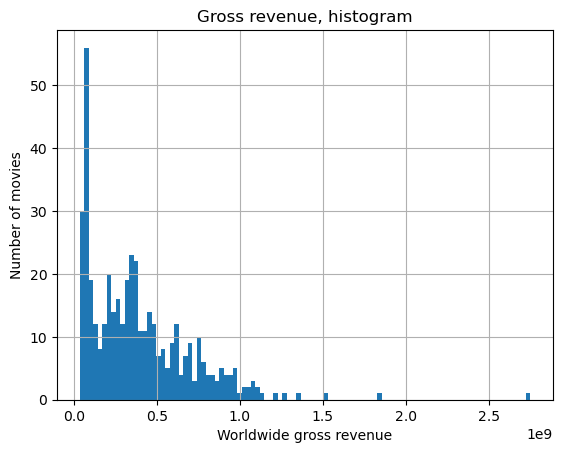

In [48]:
#we use pandas wrapper
movies['worldwide_gross'].hist(bins = 100)

#alternatively, we can use matplotlib directly
#plt.hist(movies['worldwide_gross'].values, bins = 100)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('Number of movies')
plt.title('Gross revenue, histogram');
plt.show()

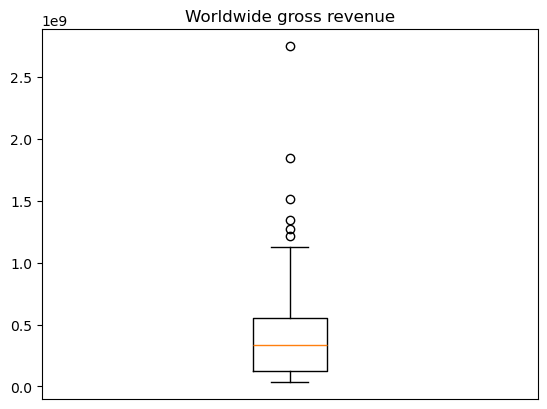

In [49]:
plt.boxplot(movies['worldwide_gross'])
plt.xticks([]) #隐藏x轴刻度标签
plt.title('Worldwide gross revenue');
plt.show()

## Visualizing two continuous variables

- Let's see if blockbusters with higher ratings also make more revenue!
- There are many ways how a relationship between two variables can be examined. The simplest one is a scatterplot, using plt.scatterplot().

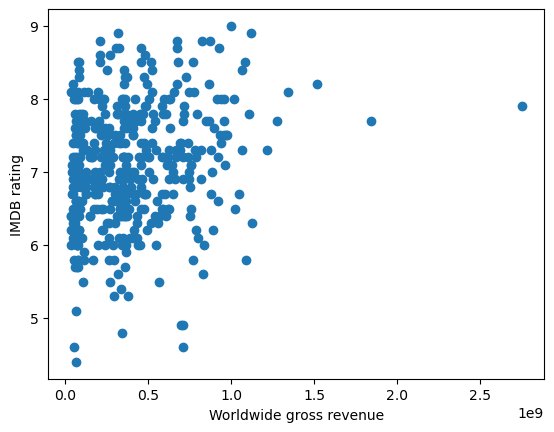

In [50]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'])

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')
plt.show()

- Visually examining the plot, how do you interpret the relationship between revenue and IMDB rating?
- Markers indicatig the datapoints seem too large, and we cannot get a sense of the distribution in the area of the plot where the markers are overlapping.
- We'll try to make the markers smaller by specifying a small "s" size parameter.

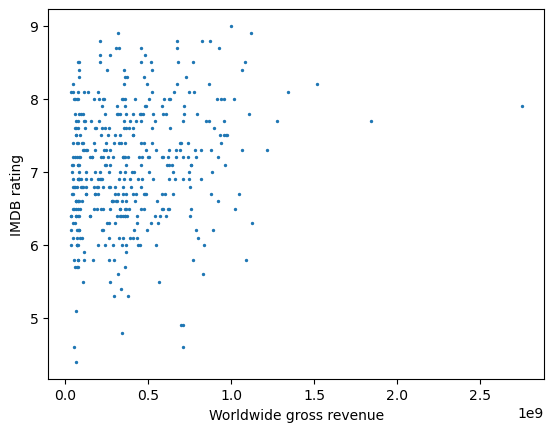

In [51]:
plt.scatter(movies['worldwide_gross'], movies['imdb_rating'], s = 2)

plt.xlabel('Worldwide gross revenue')
plt.ylabel('IMDB rating')
plt.show()

- Do you notice anything strange? What could be the reason?

光从上图中很难看出两者的关系，只能粗浅的得到，票房最高的电影并不意味着评分最高

Scatterplots are not useful when the number of datapoints is very large, as it becomes hard to interpret it. Seaborn library offers many alternative effective ways of visualizing join distributions. 

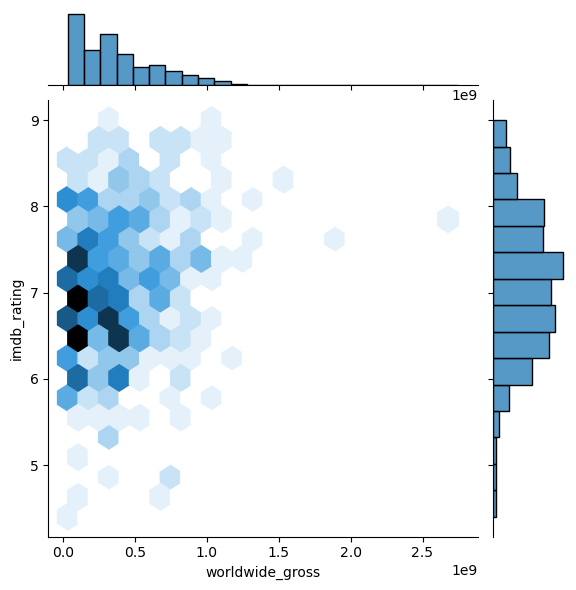

In [52]:
sns.jointplot(x=movies['worldwide_gross'], y=movies['imdb_rating'], kind="hex") #hex代表主图是六边形分箱图，边缘是直方图
plt.show()

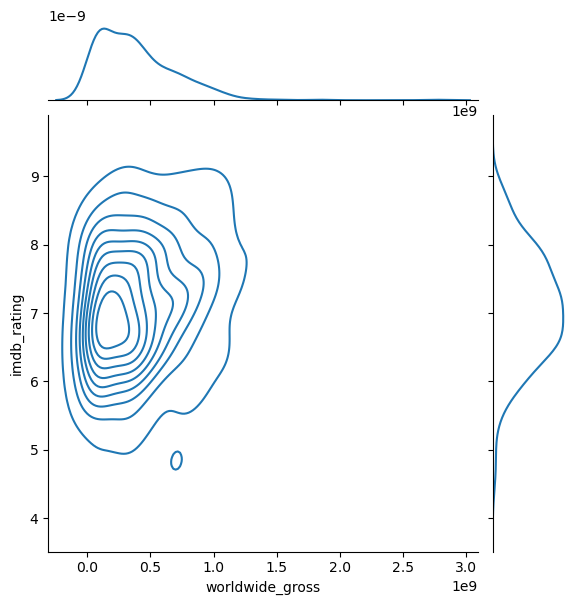

In [53]:
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="kde") #kde代表核密度估计图,主图为2D密度图；边缘图展示单变量分布
plt.show()

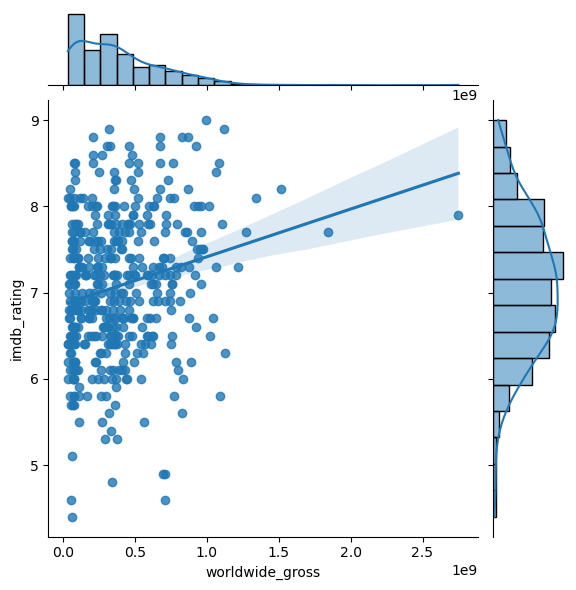

In [54]:
# 主图（回归散点图）：在散点图的基础上绘制了一条拟合的线性回归线；显示回归线的置信区间（通常用阴影表示，默认为 95% 置信区间）
# 边缘图（Marginal Distributions）：在横轴顶部和纵轴右侧分别绘制 x 和 y 变量的单变量分布图（通常是直方图）。
sns.jointplot(data = movies, x = 'worldwide_gross', y = 'imdb_rating', kind="reg")
plt.show()

## Visualizing two variables, continuous and categorical

- Let's consider the five most prevalent genres, and examine the revenue.
- We'll show barplot (we get errorbars by default, how neat!), boxplot, and violinplot. Seaborn offers many more compelling visualizations. We will stop here, but see the gallery for more examples: https://seaborn.pydata.org/examples/index.html

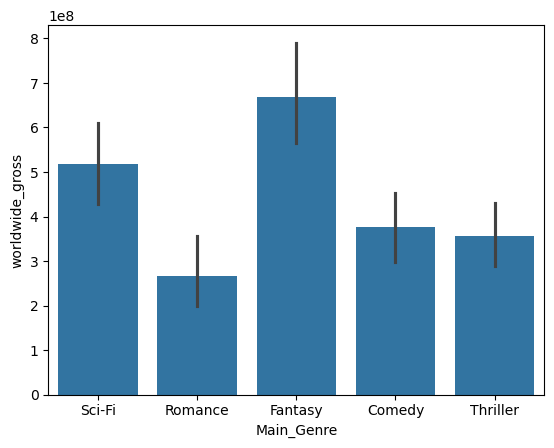

In [55]:
# barplot会自己计算每种category下所有电影的票房的平均值
# movies.loc()筛选出满足条件的df
ax = sns.barplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])
plt.show()

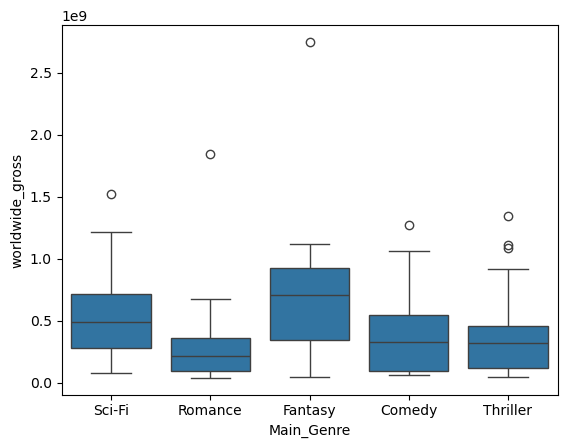

In [56]:
ax = sns.boxplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])
plt.show()

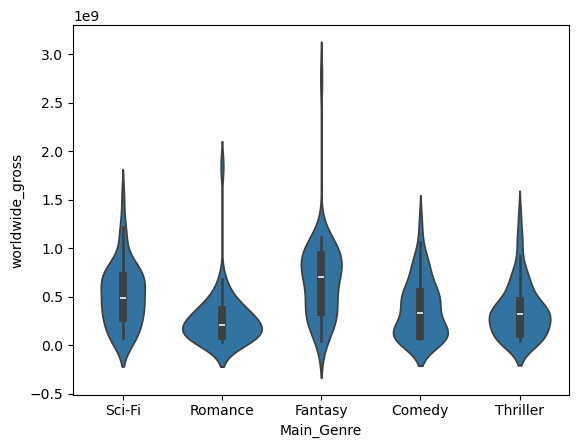

In [57]:
ax = sns.violinplot(x="Main_Genre", y="worldwide_gross", data=movies.loc[movies['Main_Genre'].isin(['Thriller','Comedy',
                                                                                      'Fantasy','Sci-Fi','Romance'])])
plt.show()

# 2. Exercises: Making more advanced visualizations


To make a good data visualization, we first need a clear idea of what we want to visualize! Do we aggregate the data, and how? What quantity should be on the different axis? How to use colors and item sizes? It often helps to sketch the visualization by hand before coding it up. By doing that, we can also give ourselves a moment to speculate what the visualization could look like under different hypotheses.

In the next three excercises, you are provided with descriptions and rough sketches of visualizations that are possibly useful to understand the movies dataset.


## 2.1 Visualizing uncertainty

- How did the average revenue of blockbusters evolve? Visualize the average yearly worldwide gross revenue, together with the standard deviation. Below, you are provided with two rough sketches of how the visualization could look like. We could indicate the margin of error with lines with caps, or by contouring between the upper and lower bound.

- Hints: use Matplotlib errorbar and fill_between functions.

- Did the average revenue increase/decrease over time? What do you observe?


<img src="figure0.jpg" style="width: 400px;" align="left" />
<img src="figure1.jpg" style="width: 400px;" align="left"/>


<br>


In [64]:
# Calculate yearly stats across movies here
# 对每个x即每个年份对应的分组返回一个series，包括两列，平均票房和标准差
stats_by_year = movies.groupby(movies['year']).apply(lambda x: pd.Series({
        'average_worldwide_gross': x['worldwide_gross'].mean(),
        'std_dev_worldwide_gross': x['worldwide_gross'].std()
    }))

stats_by_year.head()

C:\Users\uji_crush\AppData\Local\Temp\ipykernel_32092\2668391403.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_by_year = movies.groupby(movies['year']).apply(lambda x: pd.Series({


,average_worldwide_gross,std_dev_worldwide_gross
year,,
1975,4.096674e+07,6.449858e+06
1976,6.642076e+07,2.287164e+07
1977,9.808576e+07,8.039820e+07
1978,8.944416e+07,3.714570e+07
1979,8.086015e+07,1.129196e+07


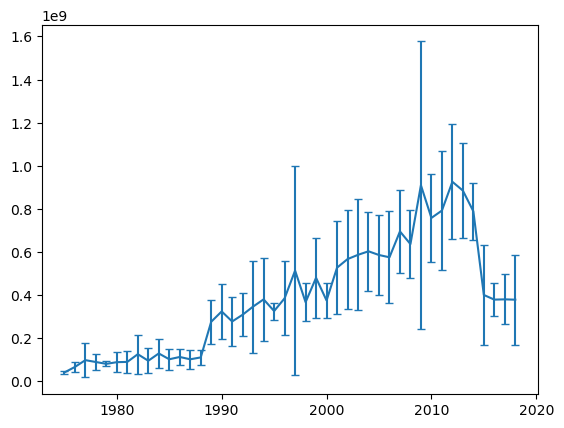

In [65]:
# Write your code to make plot with errorbars here
# 值得注意的是，这里的横坐标是stats_by_year表格的index
# yerr来添加error，capsize控制横线
plt.errorbar(stats_by_year.index, stats_by_year.average_worldwide_gross, yerr= stats_by_year.std_dev_worldwide_gross, capsize=3)
plt.show()

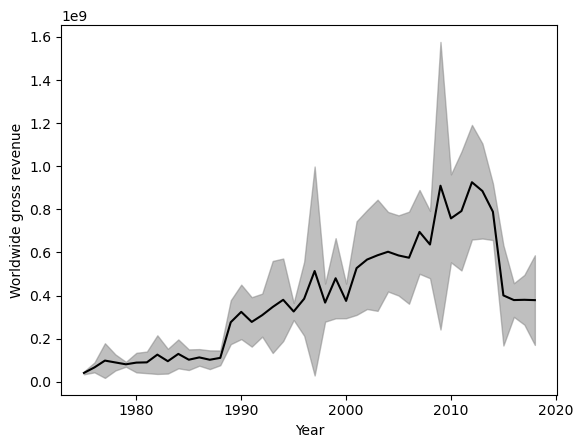

In [66]:
# Write your code to make filled plot here
# fill_between函数只需要给出横坐标，纵坐标边界的上下值，透明度和颜色
# 所以中间的实线需要自己添加
plt.fill_between(stats_by_year.index, stats_by_year.average_worldwide_gross-stats_by_year.std_dev_worldwide_gross, 
                 stats_by_year.average_worldwide_gross + stats_by_year.std_dev_worldwide_gross, alpha=0.5, color='grey')
plt.plot(stats_by_year.index, stats_by_year.average_worldwide_gross, color='black')

plt.xlabel('Year')
plt.ylabel('Worldwide gross revenue')

plt.show()

In [77]:
# Write your interpretation here
# 平均票房并不随着年份一直增长或降低，他是不断在波动中的

## 2.2 Creating panels

- Next, we want to understand how long the blockbusters are in the different genres. When working with a large number of categories (we have 16 genres in the movies dataset), the visualizations easily become cluttered, and it becomes useful to make panels with small subplots.

- Make a 4x4 panel for the 16 genres. In each subplot, show a histogram with the distribution of movie lengths for different categories. Below, find a skets of how this visualization could look like. Note the same x- and y-scale that allows comparison between categories!

- Hints: use Matplotlib subplots function to initialize the subplotting axes.

- What genres do the longest movies belong too? What can you say about the length of Comedy and animation movies?

- How could we assign different color to each subplot (each genre)? What type of palette would be the best choice? Make a variation of the visualzation where each genre is visualized in a different color.

<img src="figure3.jpg" style="width: 500px;" align="left">

In [79]:
# Calculate stats by genre here
stats_by_genre = movies.groupby('Main_Genre').apply(lambda x: pd.Series({'length': x['length'].values}))
stats_by_genre.head()

C:\Users\uji_crush\AppData\Local\Temp\ipykernel_32092\1638267933.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_by_genre = movies.groupby('Main_Genre').apply(lambda x: pd.Series({'length': x['length'].values}))


,length
Main_Genre,
Action,"[135, 156, 129, 119, 147, 118, 135, 112, 152, ..."
Adventure,"[146, 122, 106, 139, 140, 127, 163, 121, 127, ..."
Animation,"[118, 90, 100, 90, 108, 108, 94, 91, 98, 91, 1..."
Comedy,"[102, 104, 88, 93, 102, 103, 106, 103, 93, 96,..."
Crime,"[128, 120, 147, 133, 128, 130, 111, 104, 85, 1..."


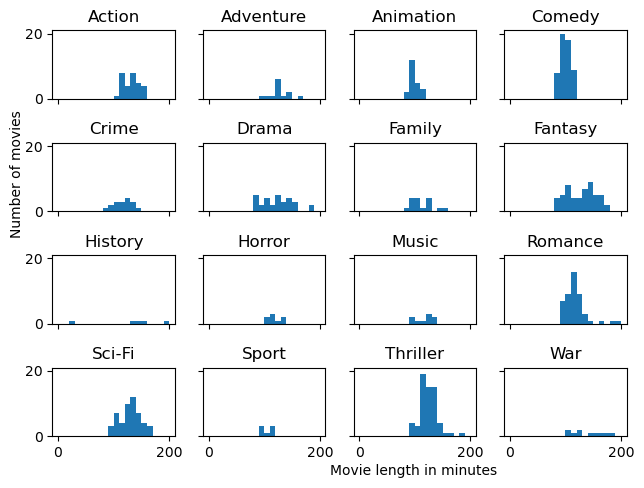

In [83]:
# Write your code to make 4x4 panel here
# fig：整个画布对象（Figure），用于控制总体的图形属性（如标题、大小等）; ax：包含所有子图的数组（Axes），用于绘制每个具体子图
# sharey=True, sharex=True：让所有子图共享同一个 Y 轴（sharey=True）和同一个 X 轴（sharex=True）
# i%4：取模运算，计算当前子图在网格中的列索引（0~3); math.floor(i/4)：将 i 除以 4 并取整，计算当前子图在网格中的行索引（0~3）
# fig.text函数第一个值代表在横轴上的位置[0，1],第二个值代表纵轴

fig, ax = plt.subplots(4,4,sharex=True,sharey=True)

for i in range(16):
    sbplt= ax[math.floor(i/4),i%4]
    sbplt.hist(stats_by_genre.iloc[i].values, range=[0,200],bins=20)
    sbplt.set_title(stats_by_genre.index[i])

fig.tight_layout()
fig.text(0.5,0, "Movie length in minutes")
fig.text(0,0.5, "Number of movies", rotation = 90)

plt.show()


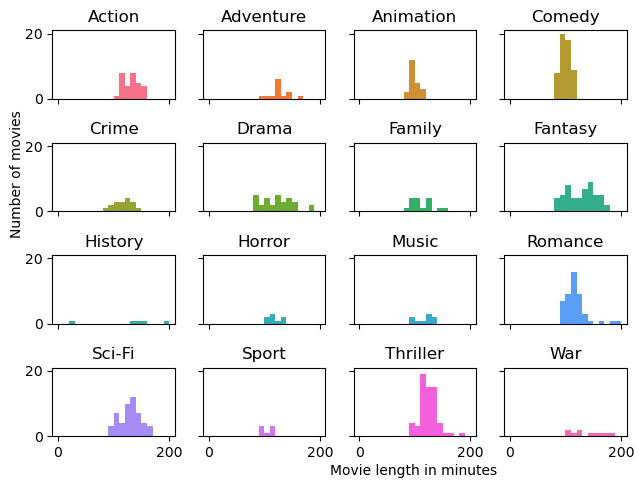

In [84]:
fig, ax = plt.subplots(4,4,sharex=True,sharey=True)

palette = sns.color_palette("husl", 16)

for i in range(16):
    sbplt= ax[math.floor(i/4),i%4]
    color= palette[i]
    sbplt.hist(stats_by_genre.iloc[i].values, range=[0,200],bins=20,color=color)
    sbplt.set_title(stats_by_genre.index[i])

fig.tight_layout()
fig.text(0.5,0, "Movie length in minutes")
fig.text(0,0.5, "Number of movies", rotation = 90)

plt.show()

In [69]:
# Write your interpretation here
# 最长的电影应该是romance和history，都有一部200分钟的
# comedy电影和animation电影长度都差不多，但是comedy的电影更多

## 2.3 Heatmaps

- What studios make blockbusters in which genre? 

- There are many studios and many genres. When working with two variables that both have many different categories, there is often no space for representing each combination of two categories with a detailed plot (such as barplot of boxplot). It becomes useful to represent each stratum with one number, indicated with color in a heatmap. Such visualizations are useful to quickly understand the data.

- Visualize the number of blockbusters made by each studio, of each genre. You will find below a rough sketch. Hint: use Seaborn heatmap function. 

- Finally, with a heatmap we can represent three variables, by coding a third variable with color. Try to understand what is the relationship between genres by understanding the co-occurence patterns between the main and secondary genre. What is the average worldwide gross revenue for movies with different combinations of main and second genre?

- You should be able to easily answer the following questions from the two visualizations: What genres do the majority of movies made by Warner Bros studio fall into? What is the most successful genre of Walt Disney pictures movies? What studio made the largest number of Romance blockbusters? Which combination of genres brings the highest revenue?



<img src="figure4.jpg" style="width: 500px;" align="left">

In [88]:
# Write your code to make the first heatmap here
# pd.crosstab 是 Pandas 提供的一个函数，用于计算两个分类变量的频率（计数）表
# annot=True：在每个单元格中显示具体的数值（即 df2 中的值）
# vmin=0 和 vmax=20：设置热力图颜色映射的值范围：vmin=0：表示颜色映射的最小值是 0。vmax=20：表示颜色映射的最大值是 20。
# pd.crosstab 的第一个参数对应热力图的 Y 轴（纵轴）; pd.crosstab 的第二个参数对应热力图的 X 轴（横轴）

df2 = pd.crosstab(movies['Main_Genre'],movies['studio'])
df2.head()

studio,20th Century Fox,Columbia Pictures,DreamWorks,Embassy Pictures,IFC Films,Lionsgate Films,Metro-Goldwyn-Mayer,National Air and Space Museum,Newmarket Films,Paramount Pictures,Pixar,Sony Pictures,Sunn Classic Pictures,Universal Pictures,Walt Disney Pictures,Warner Bros
Main_Genre,,,,,,,,,,,,,,,,
Action,2,1,0,0,0,1,0,0,0,2,0,4,0,3,12,5
Adventure,1,3,0,0,0,1,1,0,0,4,0,0,0,0,0,3
Animation,2,0,0,0,0,0,0,0,0,4,5,0,0,6,4,1
Comedy,10,2,5,0,0,0,0,0,0,8,4,0,0,6,8,12
Crime,2,2,0,0,0,0,3,0,0,3,0,0,0,3,2,2


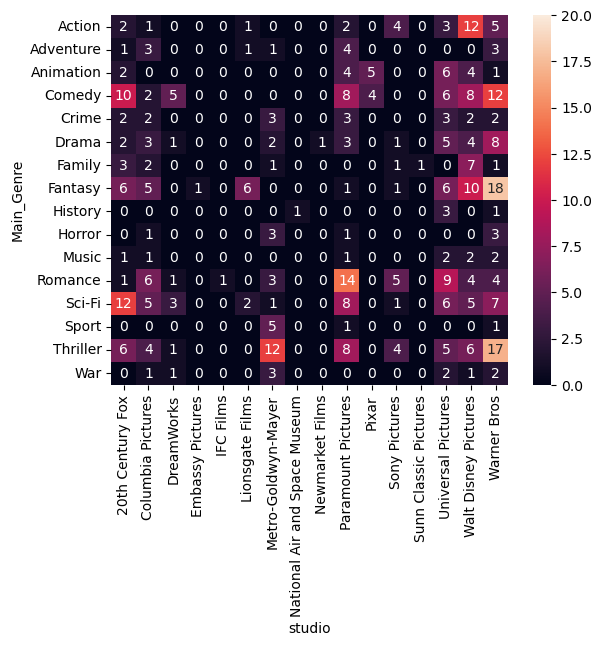

In [89]:
sns.heatmap(df2, annot=True, vmin = 0, vmax = 20)
plt.show()

In [90]:
# Write your code to make the second heatmap here
# values=movies['worldwide_gross']：指定需要聚合的数据列; margins=False: 不添加合计行或合计列; aggfunc='mean': 聚合函数，计算每个组合的平均值

df3=pd.crosstab(movies['Main_Genre'],movies['Genre_2'],values=movies['worldwide_gross'], margins=False,aggfunc='mean')
df3.head()

Genre_2,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Western
Main_Genre,,,,,,,,,,,,,,,,,
Action,NaN,4.068119e+08,NaN,2.994036e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,261336002.0,NaN
Adventure,554892407.3,NaN,NaN,1.748035e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,864912963.0,NaN
Animation,474924996.0,6.800678e+08,4.553378e+08,5.103460e+08,NaN,NaN,NaN,421378636.0,NaN,NaN,NaN,270395425.0,NaN,NaN,NaN,NaN,NaN
Comedy,108164777.2,2.659082e+08,6.562677e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179033791.0
Crime,NaN,3.514032e+08,NaN,1.473844e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


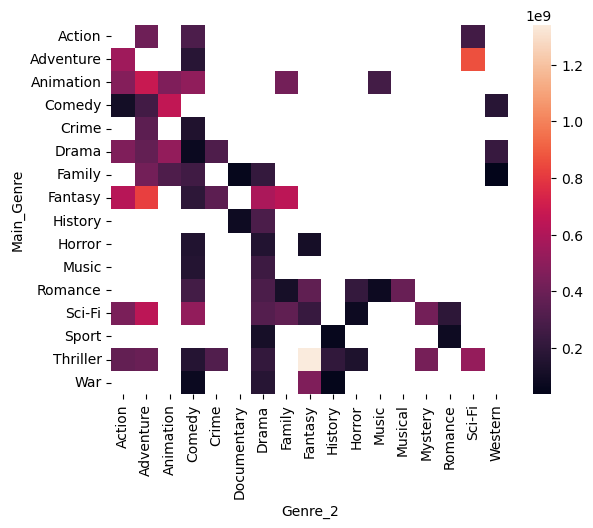

In [91]:
sns.heatmap(df3, annot=False)
plt.show()

In [92]:
# Write your interpretations here

# What genres do the majority of movies made by Warner Bros studio fall into? 
# Fantasy.

# What is the most successful genre of Walt Disney pictures movies? 
# 这个通过两个热力图无法回答吧，只能得到这个studio最致力于做什么main genre，但并不一定代表successful？他最喜欢做Action。

# What studio made the largest number of Romance blockbusters? 
# Paramount pictures

# Which combination of genres brings the highest revenue?
# Main genre：thriller，second genre：fantasy

## 2.4 Be a show-off

Finally, we did not explore the impact of the rank of the movie among the top ten. How is the rank among the top ten related to the genres? What kind of visualization can be suitable to understand this better? To practice your data viz skills, sketch a potential visualization on a piece of paper, and then implement it using the appropriate type of visualization.

In [94]:
# Write your dataviz show-off code here

stats_by_genre_rank=movies.groupby(movies['Main_Genre']).apply(lambda x: pd.Series({'rank': x['rank_in_year'].values}))
stats_by_genre_rank.head()

C:\Users\uji_crush\AppData\Local\Temp\ipykernel_32092\1964382991.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_by_genre_rank=movies.groupby(movies['Main_Genre']).apply(lambda x: pd.Series({'rank': x['rank_in_year'].values}))


,rank
Main_Genre,
Action,"[1, 2, 4, 5, 6, 7, 8, 9, 1, 3, 4, 5, 6, 8, 10,..."
Adventure,"[5, 2, 7, 3, 9, 3, 8, 3, 1, 2, 2, 1, 1]"
Animation,"[3, 9, 2, 4, 7, 10, 4, 6, 3, 6, 8, 9, 10, 3, 3..."
Comedy,"[1, 7, 5, 8, 8, 9, 10, 1, 5, 6, 10, 4, 8, 5, 6..."
Crime,"[8, 7, 10, 6, 8, 3, 10, 2, 8, 3, 10, 7, 3, 8, ..."


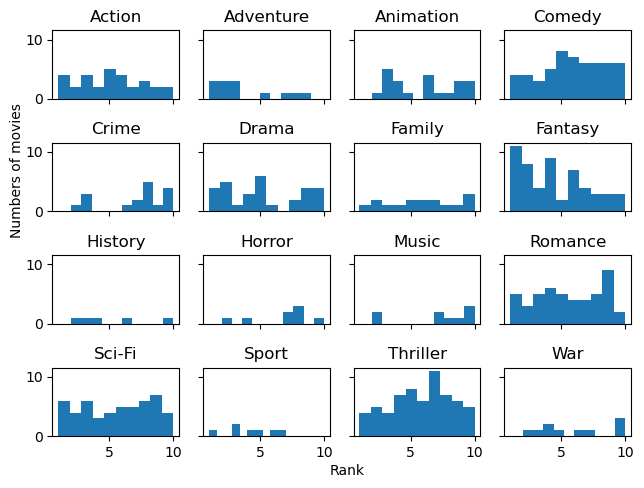

In [96]:
fig,ax=plt.subplots(4,4,sharex=True,sharey=True)

for i in range(16):
    sbplt=ax[math.floor(i/4),i%4]
    sbplt.hist(stats_by_genre_rank.iloc[i])
    sbplt.set_title(stats_by_genre_rank.index[i])

fig.tight_layout()
fig.text(0.5,0,"Rank")
fig.text(0,0.5, "Numbers of movies",rotation=90)
plt.show()    

## Part 3: Visualizing skewed distributions

__3.A__ Familiarize yourself with the "pop_per_commune" dataframe, that contains information about each commune, and its population. Plot a histogram of the population counts (population_Dec) and explain your observations. Do not use a log-scale plot for now. What does this histogram tell you about urban and rural communes in Switzerland? Are there any clear outliers on either side, and if so, which communes?

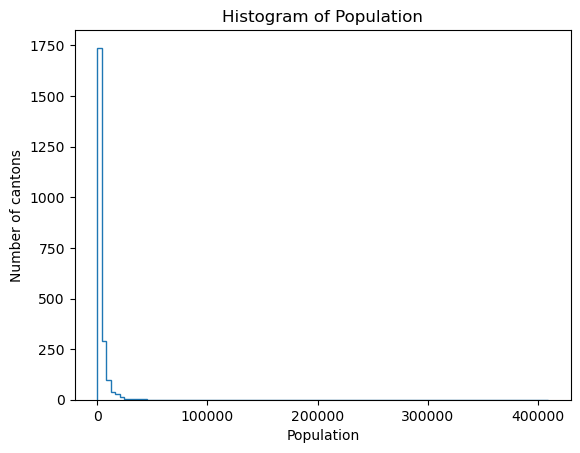

In [100]:
# Write your code here
# 'step'：用线条绘制直方图的轮廓，而不是填充的柱子。

plt.hist(pop_per_commune.population_Dec,bins=100,histtype='step')
plt.title('Histogram of Population')
plt.ylabel('Number of cantons')
plt.xlabel('Population')
plt.show()



__3.B__ The figure below represents 4 types of histogram. At this stage, your distribution should look like Fig.(a). A common way to represent [power-laws](https://en.wikipedia.org/wiki/Power_law) is to use a histogram using a log-log scale  -- remember: the x-axis of an histogram is segmented in bins of equal sizes and y-values are the average of each bin. As shown in Fig.(b), small bins sizes might introduce artifacts. Fig.(b) and Fig.(c) are examples of histograms with two different bin sizes. Another great way to visualize such distribution is to use a cumulative representation, as shown in Fig.(d), in which the y-axis represents the number of data points with values greater than y. Create the figures (b) and (d) using the data extracted for task 1A. For Fig.(b), represent two histograms using two different bin sizes and provide a brief description of the results. What does this tell you about the relationship between the two variables, namely the frequency of each bin and the value (i.e. population in case of the communal data) for each bin?

<img src="plaw.png" style="width: 600px;" align="left">
  
The figure is extracted from [this paper](https://arxiv.org/pdf/cond-mat/0412004.pdf) that contains more information about this family of distributions.

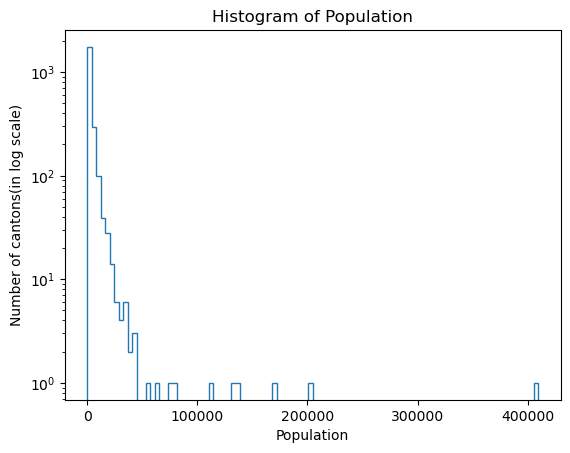

In [101]:
# Write your code here
array_100 = plt.hist(pop_per_commune.population_Dec,bins=100,log=True, histtype='step')
plt.title('Histogram of Population')
plt.ylabel('Number of cantons(in log scale)')
plt.xlabel('Population')
plt.show()

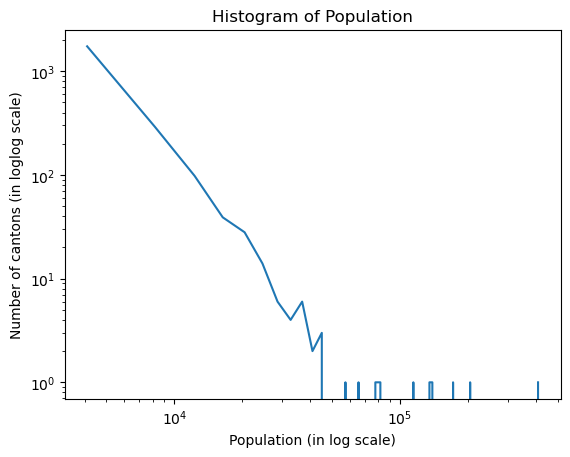

In [102]:
# plt.hist 返回值包含三个部分：
# array_100[0]：每个区间的频数（Y 轴）。对应的是每个 bins 区间中有多少数据点。
# array_100[1]：每个区间的边界（X 轴）。是一个长度为 bins+1 的数组，表示区间的左右边界。
# 例如，如果 bins=100 且数据范围为 [600, 3000]，array_100[1] 可能是 [600, 624, 648, ..., 3000]。

# array_100[1][1:] 的含义: 表示区间的右边界，去掉了第一个值。
# 在直方图中，每个区间的频数（Y 值）通常与区间右边界（X 值）匹配，因此需要用 array_100[1][1:]。

plt.loglog(array_100[1][1:], array_100[0])
plt.title("Histogram of Population")
plt.xlabel("Population (in log scale)")
plt.ylabel("Number of cantons (in loglog scale)")
plt.show()

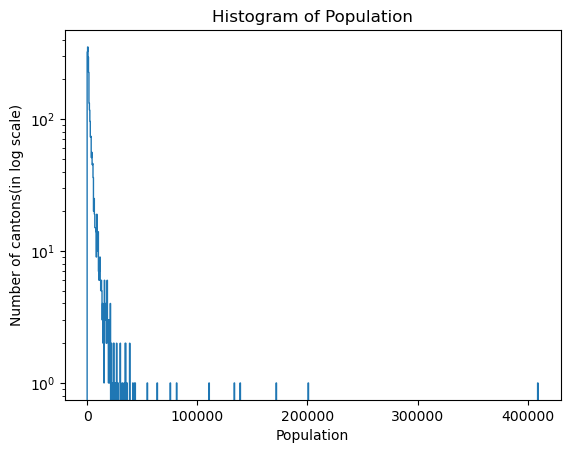

In [103]:
array_1000 = plt.hist(pop_per_commune.population_Dec,bins=1000,log=True, histtype='step')
plt.title('Histogram of Population')
plt.ylabel('Number of cantons(in log scale)')
plt.xlabel('Population')
plt.show()

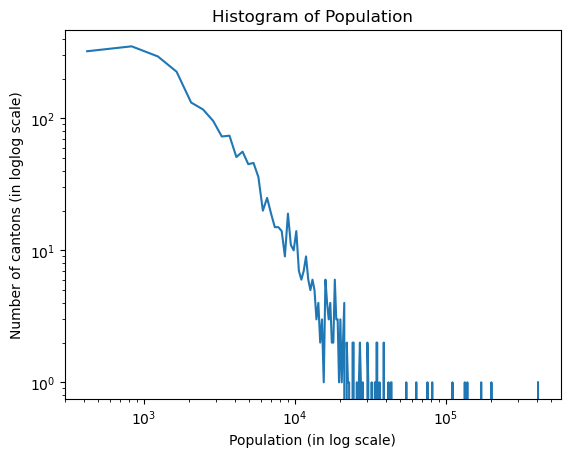

In [104]:
plt.loglog(array_1000[1][1:], array_1000[0])
plt.title("Histogram of Population")
plt.xlabel("Population (in log scale)")
plt.ylabel("Number of cantons (in loglog scale)")
plt.show()

当设置1000个bins时，bin size过于小，引入了尾部artifact

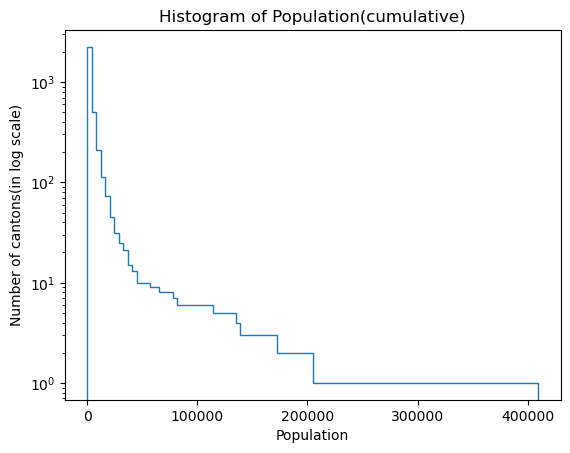

In [105]:
# cumulative=-1 表示绘制的是反向累积直方图, 频数表示大于等于当前区间的所有数据点的数量。
# cumulative=False（默认）：普通直方图，显示每个区间的频数。
# cumulative=True：正向累积直方图，显示从左到右累积的频数。

array_cumulative = plt.hist(pop_per_commune.population_Dec,cumulative=-1, bins=100,log=True, histtype='step')
plt.title('Histogram of Population(cumulative)')
plt.ylabel('Number of cantons(in log scale)')
plt.xlabel('Population')
plt.show()

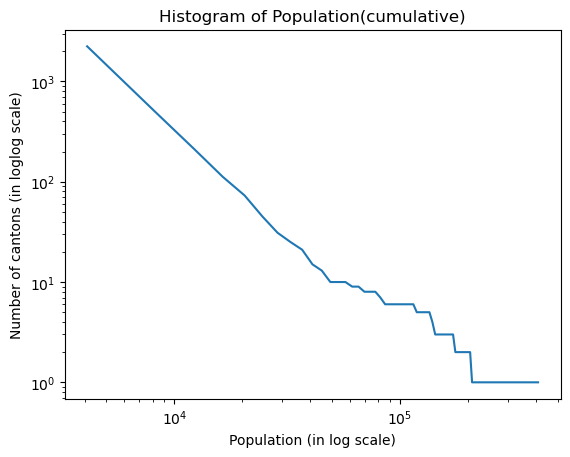

In [106]:
plt.loglog(array_cumulative[1][1:], array_cumulative[0])
plt.title("Histogram of Population(cumulative)")
plt.xlabel("Population (in log scale)")
plt.ylabel("Number of cantons (in loglog scale)")
plt.show()

In [107]:
# Write your interpretations here
# 基本满足powerlaw，长尾分布，大城市是少数